# Analyzing Box Office Trends for 2018

## Devin Popa and Noah Bathras

### Introduction

As the star power, filming equipment, and post-production effects that make up modern films all improve, the budgets for these movies simultaneously increase dramatically.  This means it can be difficult for directors behind large studio films to make a return on their investment if they do not know what audiences want from movies.  In this project, we will be examining the role of a movie's genre, release date, target audience, and distributor in determining how much money it makes.  Then, we will compare the budgets and earnings of a sample of movies to find out how profitable a movie is based on each of these factors.

### Data Collection

The data we will be using can be found at https://www.the-numbers.com/market/2018/top-grossing-movies.  A request to the site will scrape the data initially, and BeautifulSoup will be used to parse the html of the page.  Several packages in the NumPy stack will be used to visualize and analyze the data.

In [20]:
# Necessary packages.  Add more as needed.
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import html5lib
import lxml     # open a new terminal and pip install lxml before running
import matplotlib.pyplot as plt

# Make a request to the website to collect the data as html code.
req = requests.get('https://www.the-numbers.com/market/2018/top-grossing-movies')
req.encoding = 'utf-8' # completes "Fix weird characters showing up in move title" problem
soup = BeautifulSoup(req.text)

# Remove all links/tags from the entries
table = soup.find('table')
for a in table.findAll('a'):
    a.replaceWithChildren() 

# Create a new DataFrame from the table variable
df_list = pd.read_html(str(table))
movie_df = df_list[0]
movie_df.columns = ['rank', 'movie', 'releaseDate', 'distributor', 
                    'genre', 'rating', 'domesticGross', 'ticketsSold']
movie_df = movie_df.drop([0, 528, 529])     # drop unnecessary rows
# removes any rows that do not have data in them
movie_df = movie_df.dropna()

# converts annual gross to a number
annualGrossConvert = []
for index, row in movie_df.iterrows():
    converted_string = int(row["domesticGross"][1:].replace(",", ""))
    annualGrossConvert.append(converted_string)
movie_df["domesticGross"] = annualGrossConvert
    
# converts ticketsSold to numbers
movie_df["ticketsSold"] = pd.to_numeric(movie_df["ticketsSold"])
    
movie_df.head(15)

# TODO
# 1. [!!!COMPLETED!!!] Fix weird characters showing up in movie titles
# 2. Basically all of the actual shit'
# 3. 
# 4. Maybe try to predict how a movie will do based on releaseDate, distributor, genre, and rating 
#        Need to determine what indicates how a movie did: rank, annualGross, ticketsSold
# 6. Figure out how to convert the non-numeric data we want to train on into numeric numbers.
# 5. Another piece of data that I feel would be very useful would be how much money was spent on the movie, director, cast

,rank,movie,releaseDate,distributor,genre,rating,domesticGross,ticketsSold
1,1,Black Panther,2/16/2018,Walt Disney,Action,PG-13,700059566,78044544
2,2,Avengers: Infinity War,4/27/2018,Walt Disney,Action,PG-13,678815482,75676196
3,3,Incredibles 2,6/15/2018,Walt Disney,Adventure,PG,608546980,67842472
4,4,Jurassic World: Fallen Kingdom,6/22/2018,Universal,Action,PG-13,416769345,46462580
5,5,Deadpool 2,5/18/2018,20th Century Fox,Action,R,318491426,35506290
6,6,Jumanji: Welcome to the Jungle,12/20/2017,Sony Pictures,Adventure,PG-13,235506359,26254889
7,7,Mission: Impossible—Fallout,7/27/2018,Paramount Pictures,Action,PG-13,220159104,24543935
8,8,Ant-Man and the Wasp,7/6/2018,Walt Disney,Action,PG-13,216648740,24152590
9,9,Solo: A Star Wars Story,5/25/2018,Walt Disney,Adventure,PG-13,213767512,23831383
10,10,Venom,10/5/2018,Sony Pictures,Action,PG-13,212268048,23664219


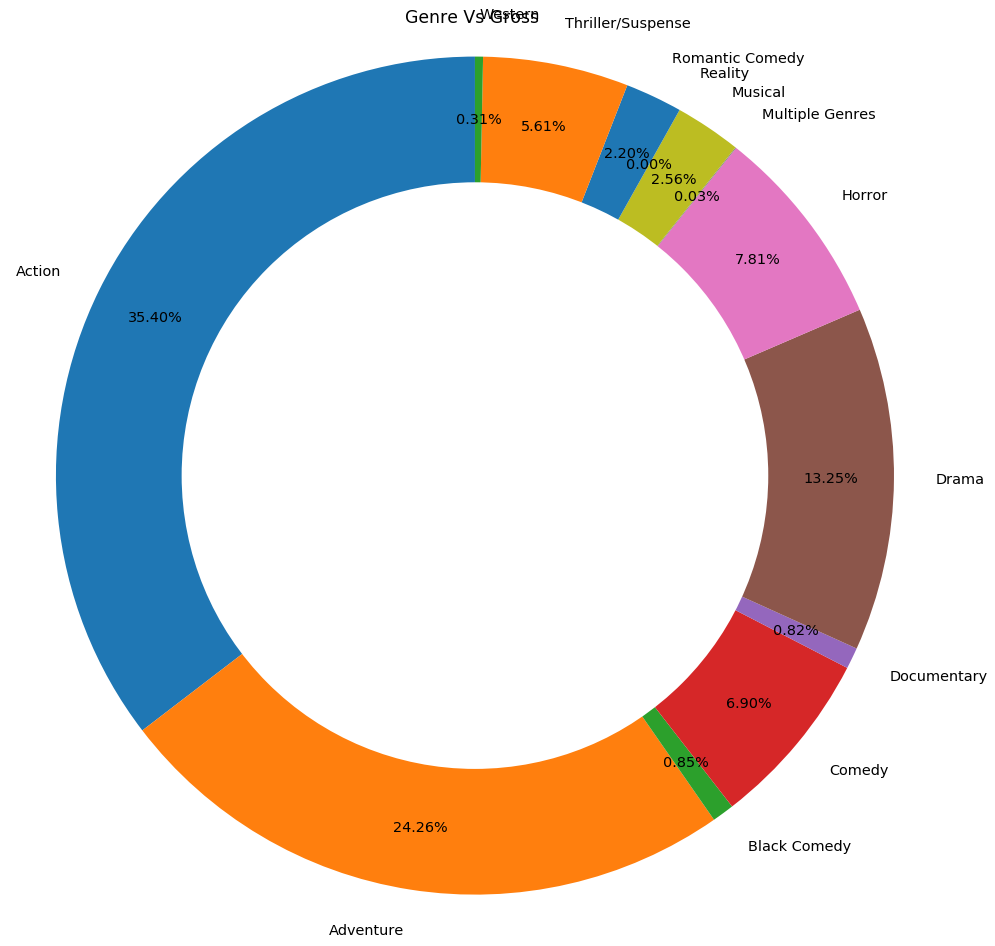

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

grouped = movie_df.groupby(['genre'])['domesticGross'].sum()

labels = grouped.index.tolist()
values = grouped.tolist()
explode = [0.0] * len(labels)

mpl.rcParams['font.size'] = 13.0
fig1, ax1 = plt.subplots(figsize=(12,12), dpi=80)
ax1.set_title('Genre Vs Gross')

ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

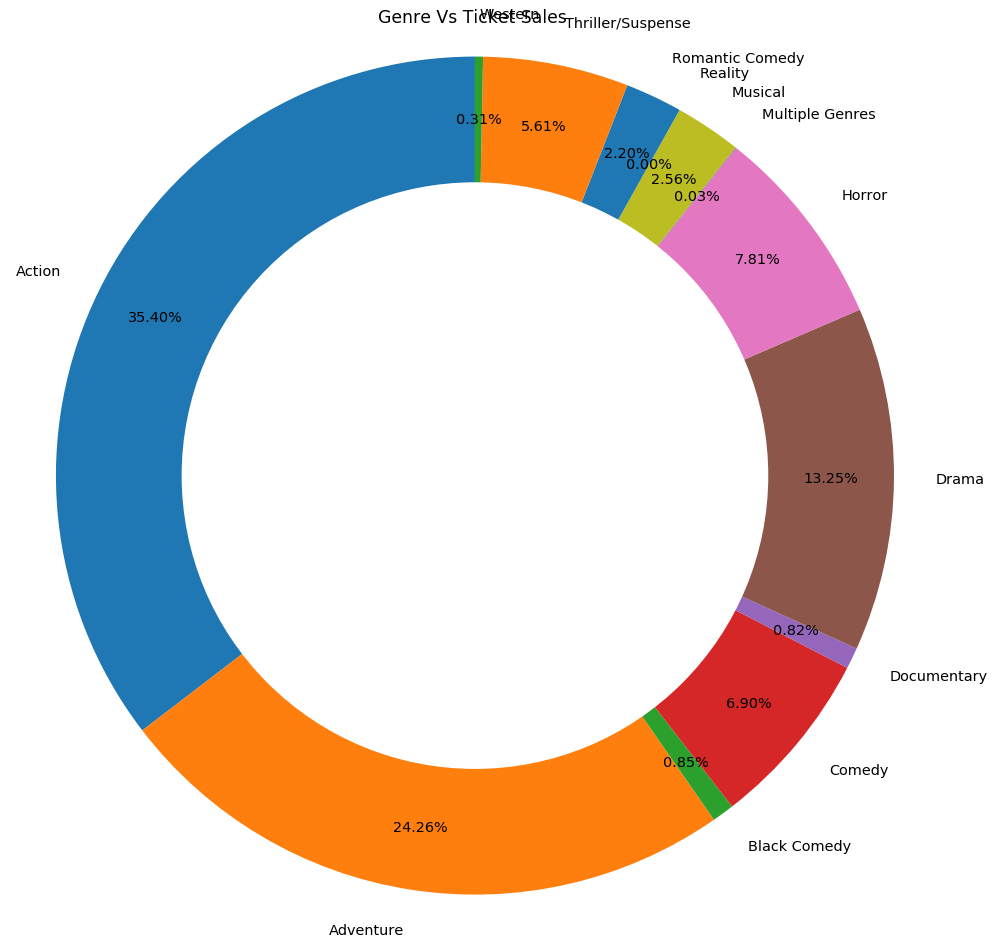

In [22]:
grouped = movie_df.groupby(['genre'])['ticketsSold'].sum()

labels = grouped.index.tolist()
values = grouped.tolist()
explode = [0.0] * len(labels)

mpl.rcParams['font.size'] = 13.0
fig1, ax1 = plt.subplots(figsize=(12,12), dpi=80)
ax1.set_title('Genre Vs Ticket Sales')

ax1.pie(values, labels=labels, autopct='%1.2f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

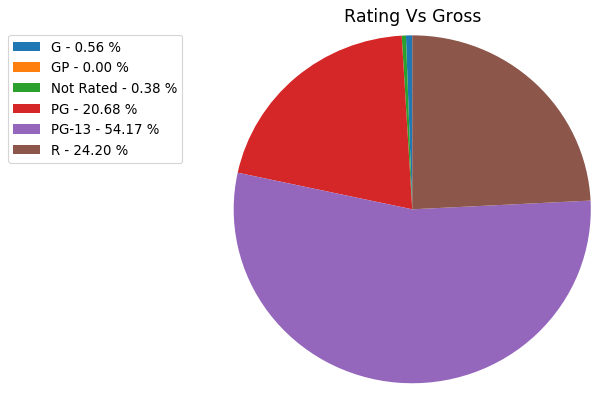

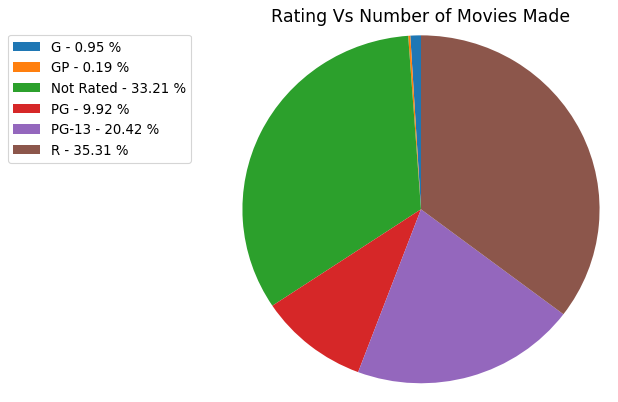

In [23]:
# example data
# x = np.char.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov','Dec'])
# y = np.array([234, 64, 54,10, 0, 1, 0, 9, 2, 1, 7, 7])

grouped = movie_df.groupby(['rating'])['domesticGross'].sum()

x = np.char.array(grouped.index.tolist())
y = np.array(grouped.tolist())
percent = 100.*y/y.sum()

fig1, ax1 = plt.subplots(figsize=(6,6), dpi=80)
ax1.set_title('Rating Vs Gross')

patches, texts = ax1.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=12)
plt.show()

grouped = movie_df.groupby(['rating'])['domesticGross'].count()

x = np.char.array(grouped.index.tolist())
y = np.array(grouped.tolist())
percent = 100.*y/y.sum()

fig1, ax1 = plt.subplots(figsize=(6,6), dpi=80)
ax1.set_title('Rating Vs Number of Movies Made')

patches, texts = ax1.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=12)
plt.show()

In [32]:
# Request to initial budget data
req = requests.get('https://www.the-numbers.com/movie/budgets/all')
req.encoding = 'utf-8'
soup = BeautifulSoup(req.text)

# Create new DataFrame in i similar process as before
table = soup.find('table')
for a in table.findAll('a'):
    a.replaceWithChildren()
    
df_list = pd.read_html(str(table))
budget_df = df_list[0]
budget_df.columns = ['id', 'releaseDate', 'movie', 'budget', 'domesticGross', 'totalGross']
budget_df = budget_df.drop(['id', 'releaseDate', 'domesticGross'], axis=1)    # drop id column
budget_df = budget_df.drop([0])     # drop one unnecessary row
budget_df = budget_df.dropna()     # drop any missing data

# Conversion of moonetary values given as strings to integers
budgetConvert = []
totalGrossConvert = []
for index, row in budget_df.iterrows():
    converted_budget = int(row["budget"][1:].replace(",", ""))
    budgetConvert.append(converted_budget)
    converted_total = int(row['totalGross'][1:].replace(',', ''))
    totalGrossConvert.append(converted_total)
budget_df["budget"] = budgetConvert
budget_df['totalGross'] = totalGrossConvert

# Store additional numbers as strings that will help link to additional budget data
pages = []
index = 101
while index <= 5601:
    pages.append(str(index))
    index += 100

# Repeat previous steps in retrieving budget data, but with additional entries that have separate links
# WARNING: This takes a long ass time to load
for index in pages:
    req = requests.get('https://www.the-numbers.com/movie/budgets/all' + '/' + index)
    req.encoding = 'utf-8'
    soup = BeautifulSoup(req.text)

    table = soup.find('table')
    for a in table.findAll('a'):
        a.replaceWithChildren()
    
    df_list = pd.read_html(str(table))
    other_budget_df = df_list[0]
    other_budget_df.columns = ['id', 'releaseDate', 'movie', 'budget', 'domesticGross', 'totalGross']
    other_budget_df = other_budget_df.drop(['id', 'releaseDate', 'domesticGross'], axis=1)    # drop id column
    other_budget_df = other_budget_df.drop([0])     # drop one unnecessary row
    other_budget_df = other_budget_df.dropna()     # drop any missing data


    budgetConvert = []
    totalGrossConvert = []
    for index, row in other_budget_df.iterrows():
        converted_budget = int(row["budget"][1:].replace(",", ""))
        budgetConvert.append(converted_budget)
        converted_total = int(row['totalGross'][1:].replace(',', ''))
        totalGrossConvert.append(converted_total)
    other_budget_df["budget"] = budgetConvert
    other_budget_df['totalGross'] = totalGrossConvert
    
    budget_df = budget_df.append(other_budget_df)

# New DataFrame containing budget and worldwide gross (not just domestic, unlike previous dataframe)
# information for a large selection of movies
budget_df

,movie,budget,totalGross
1,Avatar,425000000,2776345279
3,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
5,Avengers: Age of Ultron,330600000,1403013963
7,Star Wars Ep. VIII: The Last Jedi,317000000,1316764784
9,Star Wars Ep. VII: The Force Awakens,306000000,2053311220
11,Avengers: Infinity War,300000000,2008425124
13,Pirates of the Caribbean: At World’s End,300000000,963420425
15,Justice League,300000000,655953446
17,Spectre,300000000,879620923
19,The Dark Knight Rises,275000000,1084439099


In [33]:
# Inner join movie and budget dataframes.  Notice how this significantly decreases the number of movies
# we are working with.  Should we just roll with it?  The budget data sets I used were the best I could find.
# Maybe search for something with more 2018 movies and let me know if you find something better.
movie_df = movie_df.merge(budget_df, on='movie')
movie_df
# Duplicate entries too.  This is a start, but I can try to fix this later.

,rank,movie,releaseDate,distributor,genre,rating,domesticGross,ticketsSold,budget,totalGross
0,1,Black Panther,2/16/2018,Walt Disney,Action,PG-13,700059566,78044544,200000000,1347071259
1,2,Avengers: Infinity War,4/27/2018,Walt Disney,Action,PG-13,678815482,75676196,300000000,2008425124
2,3,Incredibles 2,6/15/2018,Walt Disney,Adventure,PG,608546980,67842472,200000000,1237567549
3,4,Jurassic World: Fallen Kingdom,6/22/2018,Universal,Action,PG-13,416769345,46462580,170000000,1304866322
4,5,Deadpool 2,5/18/2018,20th Century Fox,Action,R,318491426,35506290,110000000,733809601
5,6,Jumanji: Welcome to the Jungle,12/20/2017,Sony Pictures,Adventure,PG-13,235506359,26254889,90000000,961758540
6,7,Mission: Impossible—Fallout,7/27/2018,Paramount Pictures,Action,PG-13,220159104,24543935,178000000,787553680
7,8,Ant-Man and the Wasp,7/6/2018,Walt Disney,Action,PG-13,216648740,24152590,130000000,617260330
8,9,Solo: A Star Wars Story,5/25/2018,Walt Disney,Adventure,PG-13,213767512,23831383,250000000,385329062
9,10,Venom,10/5/2018,Sony Pictures,Action,PG-13,212268048,23664219,116000000,843968048
